In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

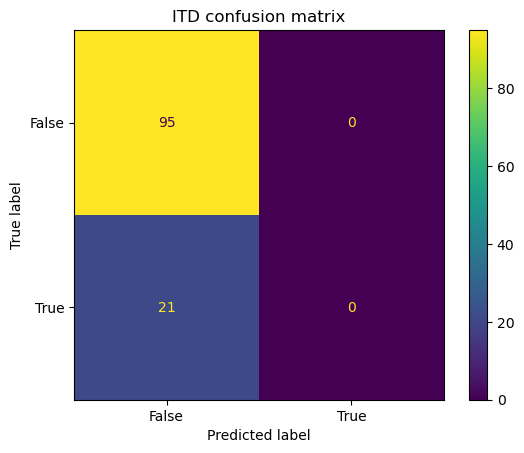

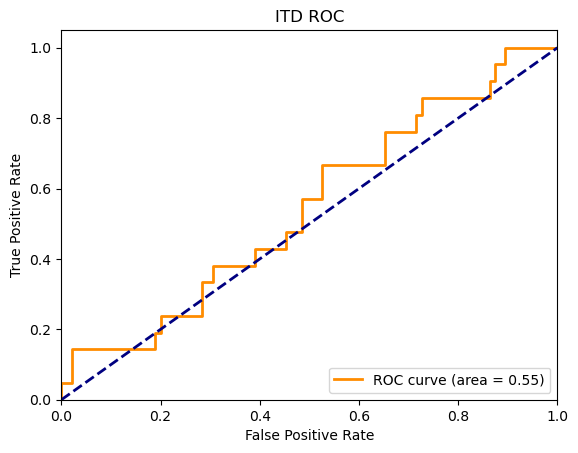

In [2]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/home/weber50432/AML_image_processing/MIL_slide_level/output/ITD_batch_256/predictions.csv', sep=",", encoding="utf-8")
# Get the true labels and predicted labels
y_true = df['target']
y_pred = df['prediction']
# Get the gene mutation probabilities
y_score = df['probability']
cm = metrics.confusion_matrix(y_true, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.title('ITD confusion matrix')
plt.show()

# Compute the false positive rate, true positive rate and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_score)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ITD ROC')
plt.legend(loc="lower right")
plt.show()

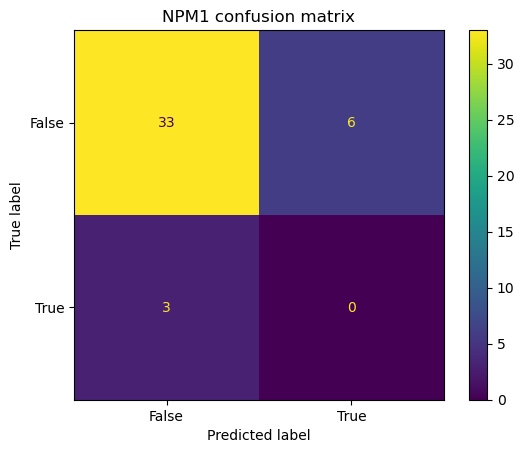

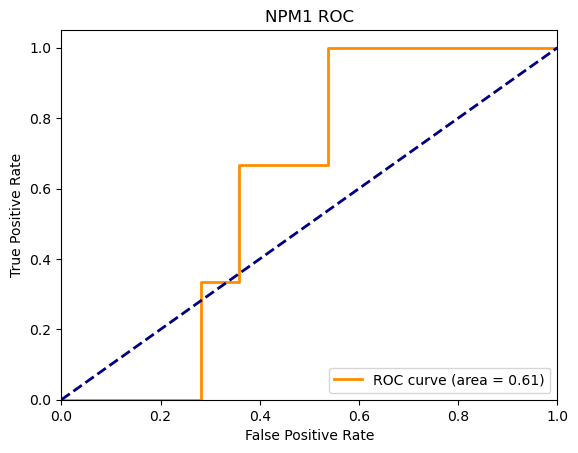

In [2]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/home/weber50432/AML_image_processing/MIL_slide_level/output/NPM1_patch_test/predictions.csv', sep=",", encoding="utf-8")
# Get the true labels and predicted labels
y_true = df['target']
y_pred = df['prediction']
# Get the gene mutation probabilities
y_score = df['probability']
cm = metrics.confusion_matrix(y_true, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.title('NPM1 confusion matrix')
plt.show()

# Compute the false positive rate, true positive rate and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_score)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('NPM1 ROC')
plt.legend(loc="lower right")
plt.show()